# Advent of Code Challenges
Code by Matthew Nemesure 

## Day 1

### Part 1

To do this, count the number of times a depth measurement increases from the previous measurement. (There is no measurement before the first measurement.)

In [1]:
data = [] # Store measurements
with open('day_1_data.txt') as f:
    for i in f.readlines():
        data.append(int(i.split("\n")[0]))

In [5]:
def calc_increased(data):
    increased = 0  # Store number of increases
    for ind, item in enumerate(data):
        if ind == 0:  # Skip first index
            continue  
        if item > data[ind-1]:  # Check if increased from previous data point
            increased +=1  # Count it
    return increased

calc_increased(data)

1374

### Part 2

Your goal now is to count the number of times the sum of measurements in this sliding window increases from the previous sum. So, compare A with B, then compare B with C, then C with D, and so on. Stop when there aren't enough measurements left to create a new three-measurement sum.

In [6]:
sliding_window_data = []  # Hold all windowed sums
for ind, item in enumerate(data):  # Loop through data
    if ind <= len(data)-3:  # Stop at the 2nd to last index
        sliding_window_data.append(sum(data[ind:ind+3]))  # add sum of current index to index + 3 to list

In [7]:
calc_increased(sliding_window_data)  # Run the calc_increased function same as part 1

1418

## Day 2

### Part 1

Your horizontal position and depth both start at 0. The steps above would then modify them as follows:

    forward 5 adds 5 to your horizontal position, a total of 5.
    down 5 adds 5 to your depth, resulting in a value of 5.
    forward 8 adds 8 to your horizontal position, a total of 13.
    up 3 decreases your depth by 3, resulting in a value of 2.
    down 8 adds 8 to your depth, resulting in a value of 10.
    forward 2 adds 2 to your horizontal position, a total of 15.
    
After following these instructions, you would have a horizontal position of 15 and a depth of 10. (Multiplying these together produces 150.)

Calculate the horizontal position and depth you would have after following the planned course. What do you get if you multiply your final horizontal position by your final depth?

In [4]:
data2 = [] # Store measurements
with open('day_2_data.txt') as f:
    for i in f.readlines():
        data2.append(i.split("\n")[0])


In [8]:
class submarine:
    def __init__(self, horizontal_start = 0, vertical_start = 0):
        self.horizontal_position = horizontal_start
        self.vertical_position = vertical_start
        
    def move_sub(self, instructions):
        split_instructions = instructions.split(" ")
        
        direction = split_instructions[0]
        amount = int(split_instructions[1])
        
        if direction == 'forward':
            self.horizontal_position+=amount
        elif direction == 'backward': # Doesn't seem to be in this data
            self.horizontal_position-=amount
        elif direction == 'down':
            self.vertical_position+=amount
        elif direction == 'up':
            self.vertical_position-=amount
        
    def multiply_horizontal_vertical(self):
        return self.horizontal_position*self.vertical_position
        

In [10]:
my_sub = submarine()
for instructions in data2:
    my_sub.move_sub(instructions)
    
print(my_sub.horizontal_position)
print(my_sub.vertical_position)
print(my_sub.multiply_horizontal_vertical())


1940
861
1670340


### Part 2

In addition to horizontal position and depth, you'll also need to track a third value, aim, which also starts at 0. The commands also mean something entirely different than you first thought:

down X increases your aim by X units.
up X decreases your aim by X units.
forward X does two things:
It increases your horizontal position by X units.
It increases your depth by your aim multiplied by X.
Again note that since you're on a submarine, down and up do the opposite of what you might expect: "down" means aiming in the positive direction.

Now, the above example does something different:

    forward 5 adds 5 to your horizontal position, a total of 5. Because your aim is 0, your depth does not change.
    down 5 adds 5 to your aim, resulting in a value of 5.
    forward 8 adds 8 to your horizontal position, a total of 13. Because your aim is 5, your depth increases by 8*5=40.
    up 3 decreases your aim by 3, resulting in a value of 2.
    down 8 adds 8 to your aim, resulting in a value of 10.
    forward 2 adds 2 to your horizontal position, a total of 15. Because your aim is 10, your depth increases by 2*10=20 to a total of 60.
    After following these new instructions, you would have a horizontal position of 15 and a depth of 60. (Multiplying these produces 900.)

Using this new interpretation of the commands, calculate the horizontal position and depth you would have after following the planned course. What do you get if you multiply your final horizontal position by your final depth?

In [12]:
# Updated submarine
class new_improved_submarine:
    def __init__(self, horizontal_start = 0, vertical_start = 0, aim = 0):
        self.horizontal_position = horizontal_start
        self.vertical_position = vertical_start
        self.aim = aim
        
    def move_sub(self, instructions):
        split_instructions = instructions.split(" ")
        
        direction = split_instructions[0]
        amount = int(split_instructions[1])
        
        if direction == 'forward':
            self.horizontal_position+=amount
            self.vertical_position+=amount*self.aim
        elif direction == 'backward': # Doesn't seem to be in this data
            self.horizontal_position-=amount
        elif direction == 'down':
            self.aim+=amount
        elif direction == 'up':
            self.aim-=amount
        
    def multiply_horizontal_vertical(self):
        return self.horizontal_position*self.vertical_position

    
my_sub_improved = new_improved_submarine()
for instructions in data2:
    my_sub_improved.move_sub(instructions)
    
print(my_sub_improved.horizontal_position)
print(my_sub_improved.vertical_position)
print(my_sub_improved.multiply_horizontal_vertical())

1940
1007368
1954293920


## Day 3

### Part 1

You need to use the binary numbers in the diagnostic report to generate two new binary numbers (called the gamma rate and the epsilon rate). The power consumption can then be found by multiplying the gamma rate by the epsilon rate.

Each bit in the gamma rate can be determined by finding the most common bit in the corresponding position of all numbers in the diagnostic report. For example, given the following diagnostic report:

00100
11110
10110
10111
10101
01111
00111
11100
10000
11001
00010
01010
Considering only the first bit of each number, there are five 0 bits and seven 1 bits. Since the most common bit is 1, the first bit of the gamma rate is 1.

The most common second bit of the numbers in the diagnostic report is 0, so the second bit of the gamma rate is 0.

The most common value of the third, fourth, and fifth bits are 1, 1, and 0, respectively, and so the final three bits of the gamma rate are 110.

So, the gamma rate is the binary number 10110, or 22 in decimal.

The epsilon rate is calculated in a similar way; rather than use the most common bit, the least common bit from each position is used. So, the epsilon rate is 01001, or 9 in decimal. Multiplying the gamma rate (22) by the epsilon rate (9) produces the power consumption, 198.

Use the binary numbers in your diagnostic report to calculate the gamma rate and epsilon rate, then multiply them together. What is the power consumption of the submarine? (Be sure to represent your answer in decimal, not binary.)

In [14]:
from collections import Counter # Useful package here

In [12]:
data3 = [] # Store measurements
with open('day_3_data.txt') as f:
    for i in f.readlines():
        data3.append(i.split("\n")[0])

In [18]:
digit_list = {} # Dictionary where key is the digit index (1,2,3,4,5 etc.) and value is list of entries over data
for digit in range(len(data3[0])): # loop through each digit
    digit_list[digit] = [] # instatiate list as dict entry
    for item in data3:
        digit_list[digit].append(item[digit]) # add item to dict

In [23]:
gamma_rate = [] # store gamma values
epsilon_rate = [] # store epsilon valeus
for key in digit_list.keys(): # loop through digit keys
    common = Counter(digit_list[key]).most_common() # get most common and least common entries
    gamma_rate.append(common[0][0]) # most common entry
    epsilon_rate.append(common[-1][0]) # least common entry

In [25]:
gamma = "".join(gamma_rate)
epsilon = "".join(epsilon_rate)

answer = int(gamma,2) * int(epsilon,2)
answer

845186

### Part 2 - This is a fun one

Keep only numbers selected by the bit criteria for the type of rating value for which you are searching. Discard numbers which do not match the bit criteria.
If you only have one number left, stop; this is the rating value for which you are searching.
Otherwise, repeat the process, considering the next bit to the right.
The bit criteria depends on which type of rating value you want to find:

To find oxygen generator rating, determine the most common value (0 or 1) in the current bit position, and keep only numbers with that bit in that position. If 0 and 1 are equally common, keep values with a 1 in the position being considered.
To find CO2 scrubber rating, determine the least common value (0 or 1) in the current bit position, and keep only numbers with that bit in that position. If 0 and 1 are equally common, keep values with a 0 in the position being considered.
For example, to determine the oxygen generator rating value using the same example diagnostic report from above:

Start with all 12 numbers and consider only the first bit of each number. There are more 1 bits (7) than 0 bits (5), so keep only the 7 numbers with a 1 in the first position: 11110, 10110, 10111, 10101, 11100, 10000, and 11001.
Then, consider the second bit of the 7 remaining numbers: there are more 0 bits (4) than 1 bits (3), so keep only the 4 numbers with a 0 in the second position: 10110, 10111, 10101, and 10000.
In the third position, three of the four numbers have a 1, so keep those three: 10110, 10111, and 10101.
In the fourth position, two of the three numbers have a 1, so keep those two: 10110 and 10111.
In the fifth position, there are an equal number of 0 bits and 1 bits (one each). So, to find the oxygen generator rating, keep the number with a 1 in that position: 10111.
As there is only one number left, stop; the oxygen generator rating is 10111, or 23 in decimal.
Then, to determine the CO2 scrubber rating value from the same example above:

Start again with all 12 numbers and consider only the first bit of each number. There are fewer 0 bits (5) than 1 bits (7), so keep only the 5 numbers with a 0 in the first position: 00100, 01111, 00111, 00010, and 01010.
Then, consider the second bit of the 5 remaining numbers: there are fewer 1 bits (2) than 0 bits (3), so keep only the 2 numbers with a 1 in the second position: 01111 and 01010.
In the third position, there are an equal number of 0 bits and 1 bits (one each). So, to find the CO2 scrubber rating, keep the number with a 0 in that position: 01010.
As there is only one number left, stop; the CO2 scrubber rating is 01010, or 10 in decimal.

In [51]:
# First lets turn my code from part 1 into a function - Need to add clause to account for ties

def get_gamma_value(input_sequence):
    digit_list = {} # Dictionary where key is the digit index (1,2,3,4,5 etc.) and value is list of entries over data
    for digit in range(len(input_sequence[0])): # loop through each digit
        digit_list[digit] = [] # instatiate list as dict entry
        for item in input_sequence:
            digit_list[digit].append(item[digit]) # add item to dict
    gamma_rate = [] # store gamma values
    epsilon_rate = [] # store epsilon valeus
    for key in digit_list.keys(): # loop through digit keys
        common = Counter(digit_list[key]).most_common() # get most common and least common entries
        if common[0][1] == common[-1][1]:
            gamma_rate.append('1')
            epsilon_rate.append('0')
        else:
            gamma_rate.append(common[0][0]) # most common entry
            epsilon_rate.append(common[-1][0]) # least common entry
    gamma = "".join(gamma_rate)
    epsilon = "".join(epsilon_rate)
    return gamma, epsilon

# Now lets begin since we have a function that can grab the most common values given an input sequence

viable_codes_g = data3 # store viable codes for oxygen (gamma)
viable_codes_e = data3 # store viable codes for c02 (epsilon)
for i in range(len(viable_codes_g[0])): # loop through each index
    if len(viable_codes_g) != 1: # stop if one value left - obviously doesn't account for edge cases
        gamma_p2, epsilon_p2 = get_gamma_value(viable_codes_g) # calculate gamma with the remaining viable codes
        new_viable_codes_g = [] # store new viable codes
        for code in viable_codes_g: # loop through current viables
            if code[i] == gamma_p2[i]: # check parameter
                new_viable_codes_g.append(code) # if met, add to new viable codes
    if len(viable_codes_e) != 1: # repeat process for epsilon
        gamma_p2, epsilon_p2 = get_gamma_value(viable_codes_e)
        new_viable_codes_e = []
        for code in viable_codes_e:
            if code[i] == epsilon_p2[i]:
                new_viable_codes_e.append(code)
    viable_codes_g = new_viable_codes_g # overwrite viable codes and repeat
    viable_codes_e = new_viable_codes_e

print(viable_codes_g)
print(viable_codes_e)
print(int(viable_codes_g[0],2))
print(int(viable_codes_e[0],2))

print(int(viable_codes_g[0],2)*int(viable_codes_e[0],2))

['010110110011']
['110001101010']
1459
3178
4636702


## Day 3

### Part 1 - Getting more difficult here

After the first five numbers are drawn (7, 4, 9, 5, and 11), there are no winners, but the boards are marked as follows (shown here adjacent to each other to save space):

After the next six numbers are drawn (17, 23, 2, 0, 14, and 21), there are still no winners:

Finally, 24 is drawn:

At this point, the third board wins because it has at least one complete row or column of marked numbers (in this case, the entire top row is marked: 14 21 17 24 4).

The score of the winning board can now be calculated. Start by finding the sum of all unmarked numbers on that board; in this case, the sum is 188. Then, multiply that sum by the number that was just called when the board won, 24, to get the final score, 188 * 24 = 4512.

In [76]:
import pandas as pd
import numpy as np
bingo_commands = pd.read_csv("day_4_data.txt", sep = '\n', header = None) # get commands
bingo_commands = [int(i) for i in bingo_commands[0][0].split(",")]
print(bingo_commands)
bingo_boards = pd.read_csv("day_4_data.txt", sep = "\n", skiprows=1, header=None) # Read in just bingo boards
bingo_boards


[17, 2, 33, 86, 38, 41, 4, 34, 91, 61, 11, 81, 3, 59, 29, 71, 26, 44, 54, 89, 46, 9, 85, 62, 23, 76, 45, 24, 78, 14, 58, 48, 57, 40, 21, 49, 7, 99, 8, 56, 50, 19, 53, 55, 10, 94, 75, 68, 6, 83, 84, 88, 52, 80, 73, 74, 79, 36, 70, 28, 37, 0, 42, 98, 96, 92, 27, 90, 47, 20, 5, 77, 69, 93, 31, 30, 95, 25, 63, 65, 51, 72, 60, 16, 12, 64, 18, 13, 1, 35, 15, 66, 67, 43, 22, 87, 97, 32, 39, 82]


,0
0,10 27 53 91 86
1,15 94 47 38 61
2,32 68 8 88 9
3,35 84 3 7 87
4,62 78 90 66 64
...,...
495,62 50 34 16 8
496,75 88 84 33 29
497,2 64 31 41 86
498,94 45 76 70 3


In [77]:
# Process the boards into separate matricies
bingo_board_list = []
for i in range(0,len(bingo_boards), 5): # loop through with window range 5
    bingo_board = bingo_boards.iloc[i:i+5,:] # get the board in unprocessed form
    bingo_board_dict = {} # store processed board
    for ind, j in enumerate(bingo_board[0]): #loop through each row in board
        bingo_board_dict[ind] = [int(num) for num in j.split(" ") if num != ""] #get individual entries
    bingo_matrix = np.matrix(pd.DataFrame(bingo_board_dict)) # create matrix
    bingo_board_list.append(bingo_matrix) # store in board list

In [78]:
bingo_board_list[0]

matrix([[10, 15, 32, 35, 62],
        [27, 94, 68, 84, 78],
        [53, 47,  8,  3, 90],
        [91, 38, 88,  7, 66],
        [86, 61,  9, 87, 64]])

In [90]:
# Next we need to create parallel boards to track scores
# What functions do we need?
# One to generate the tracker list (list of zero matricies that track the hits on each board)
# One to update the tracking board given a number and the two boards.
# One to check for a winner



def generate_tracker_list(bingo_board_list):
    bingo_tracker_list = []
    for i in range(len(bingo_board_list)):
        bingo_tracker_list.append(np.zeros((5,5)))
    return bingo_tracker_list

# Start with updating boards
def update_board(num, bingo_board, tracking_board):
    for ind, item in enumerate(bingo_board):
        if num in item:
            indexes = np.where(np.asarray(item).flatten()==num)
            # print(indexes)
            tracking_board[ind,indexes] = 1
    return tracking_board

# Check for winners in a list of tracking boards
def check_winners(tracker_list):
    winning_inds = []
    for ind, track_board in enumerate(tracker_list):
        rowsums = track_board.sum(axis=1)
        colsums = track_board.sum(axis=0)
        if 5 in np.asarray(rowsums).flatten():
            winning_inds.append(ind)
        if 5 in np.asarray(colsums).flatten():
            winning_inds.append(ind)
    return winning_inds

In [96]:
# Put it all together
bingo_tracker_list = generate_tracker_list(bingo_board_list)

for called_num in bingo_commands: # Loop bingo commands
    for ind, board in enumerate(bingo_board_list): # Loop boards
        new_tracking_board = update_board(called_num, board, bingo_tracker_list[ind]) # Update tracking board
        #print(new_tracking_board)
        bingo_tracker_list[ind] = new_tracking_board # Update tracking board in list
    #print(bingo_tracker_list)
    winning_board_ind = check_winners(bingo_tracker_list) # find a potential winning board
    if winning_board_ind != []: # if there is one - get the number and break the lop
        winning_num = called_num
        break
print(winning_board_ind, winning_num)

[22] 46


In [97]:
# now lets calculate the final score
winning_board = bingo_board_list[winning_board_ind[0]]
winning_config = bingo_tracker_list[winning_board_ind[0]]

print(winning_board)
print(winning_config)


[[73 62 45 89 49]
 [41 99 10 17 35]
 [26 58 71 29 24]
 [87  9 28 46 74]
 [95 20 39 81 32]]
[[0. 0. 0. 1. 0.]
 [1. 0. 0. 1. 0.]
 [1. 0. 1. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]]


In [105]:
unmarked_sum = 0
for row_ind, i in enumerate(winning_config):
    for col_ind, j in enumerate(i):
        if j == 0:
            unmarked_sum += winning_board[row_ind,col_ind]
print(f'Final answer: {unmarked_sum*winning_num}')

Final answer: 38594


### Part 2

On the other hand, it might be wise to try a different strategy: let the giant squid win.

You aren't sure how many bingo boards a giant squid could play at once, so rather than waste time counting its arms, the safe thing to do is to figure out which board will win last and choose that one. That way, no matter which boards it picks, it will win for sure.

In the above example, the second board is the last to win, which happens after 13 is eventually called and its middle column is completely marked. If you were to keep playing until this point, the second board would have a sum of unmarked numbers equal to 148 for a final score of 148 * 13 = 1924.

Figure out which board will win last. Once it wins, what would its final score be?



In [144]:
# Put it all together with some modifications 
bingo_tracker_list = generate_tracker_list(bingo_board_list)
previous_winning_board_ind = set()
for called_num in bingo_commands: # Loop bingo commands
    for ind, board in enumerate(bingo_board_list): # Loop boards
        new_tracking_board = update_board(called_num, board, bingo_tracker_list[ind]) # Update tracking board
        bingo_tracker_list[ind] = new_tracking_board # Update tracking board in list
    winning_board_ind = set(check_winners(bingo_tracker_list)) # all unique winning boards
    # when all boards have won or when the numbers run out
    if len(winning_board_ind) == len(bingo_tracker_list) or called_num == bingo_commands[-1]:
        # Get all winners from current round that didnt win last round
        main_list = list(set(winning_board_ind) - set(previous_winning_board_ind)) # get the most recent winner(s)
        winning_num=called_num
        break
    else:
        # if you're not done or all winners haven't been found, record the winners from the previous loop
        previous_winning_board_ind = winning_board_ind
print(main_list, winning_num)

[43] 64


In [145]:
# now lets calculate the final score
losing_board = bingo_board_list[main_list[0]]
losing_config = bingo_tracker_list[main_list[0]]

print(losing_board)
print(losing_config)

[[86 53 67 23  4]
 [89 82 75 63 39]
 [64 24  3 99  7]
 [69 16 33 13 73]
 [76 51 21 43 87]]
[[1. 1. 0. 1. 1.]
 [1. 0. 1. 1. 0.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 0. 1.]
 [1. 1. 1. 0. 0.]]


In [146]:
unmarked_sum = 0
for row_ind, i in enumerate(losing_config):
    for col_ind, j in enumerate(i):
        if j == 0:
            unmarked_sum += losing_board[row_ind,col_ind]
print(f'Final answer: {unmarked_sum*winning_num}')

Final answer: 21184


### Day 5

#### Part 1

I am just going to start summarising these. Basically given a set of vertical and horizontal lines given a set of endpoints for those lines. Determine how many points on the grid have at least 2 overlapping lines on them

In [16]:
import numpy as np

In [17]:
data5 = [] # Store measurements
with open('day_5_data.txt') as f:
    for i in f.readlines():
        data5.append(i.split("\n")[0])
data5[0:5]

['822,976 -> 822,117',
 '387,419 -> 387,468',
 '659,275 -> 318,616',
 '535,940 -> 684,940',
 '294,427 -> 294,88']

In [18]:
# Process the data into a better format
all_line_pairs = []
for item in data5:
    split_item = item.split(" -> ")
    item_pairs = []
    for sp_item in split_item:
        item_pairs.append((int(sp_item.split(',')[0]), int(sp_item.split(',')[1])))
    all_line_pairs.append(item_pairs)
all_line_pairs[0:5]

[[(822, 976), (822, 117)],
 [(387, 419), (387, 468)],
 [(659, 275), (318, 616)],
 [(535, 940), (684, 940)],
 [(294, 427), (294, 88)]]

In [19]:
# Now process to grab only pairs where x1=x2 or y1=y2 - representing horizontal and vertical lines
horizontal_vertical_line_pairs = []
for pair in all_line_pairs:
    if pair[0][0] == pair[1][0] or pair[0][1] == pair[1][1]:
        horizontal_vertical_line_pairs.append(pair)
horizontal_vertical_line_pairs[0:5]

[[(822, 976), (822, 117)],
 [(387, 419), (387, 468)],
 [(535, 940), (684, 940)],
 [(294, 427), (294, 88)],
 [(534, 387), (402, 387)]]

In [57]:
# Lets make a few useful functions
# One to instantiate a matrix to store lines
# One to take in a set of points and update that matrix

def instantiate_matrix(line_pairs):
    max_item_x = 0
    max_item_y = 0
    for i in line_pairs:
        max_x = max(i[0][0], i[1][0])
        max_y = max(i[0][1], i[1][1])
        if max_x>max_item_x:
            max_item_x = max_x
        if max_y>max_item_y:
            max_item_y = max_y
            
    tracking_matrix = np.zeros((max_item_x+1,max_item_y+1))
    return tracking_matrix

def update_matrix(line_pair, tracking_matrix):
    x_diff = abs(line_pair[0][0]-line_pair[1][0])
    y_diff = abs(line_pair[0][1]-line_pair[1][1])
    # prep for a situation where theyre both unequal in the future even though it cant happen given current
    # constraints. Make sure y diff is 0 when x diff is not 0
    if x_diff !=0 and y_diff == 0:
        starting_x = min(line_pair[0][0],line_pair[1][0])
        y_value = line_pair[0][1]
        for i in range(starting_x,starting_x+x_diff+1):
            tracking_matrix[i,y_value] += 1
    elif x_diff ==0 and y_diff != 0:
        starting_y = min(line_pair[0][1],line_pair[1][1])
        x_value = line_pair[0][0]
        for i in range(starting_y,starting_y+y_diff+1):
            tracking_matrix[x_value,i] += 1
    # For part 2 to handle diagonal lines
    elif x_diff != 0 and y_diff != 0: # Lets always build this with X moving in the positive direction
        starting_pair = np.argmin([line_pair[0][0],line_pair[1][0]]) # starting with lower X
        other_pair = np.argmax([line_pair[0][0],line_pair[1][0]]) # other pair
        starting_x = line_pair[starting_pair][0] # lower X
        starting_y = line_pair[starting_pair][1] # y can be higher or lower in this case
        for ind, i in enumerate(range(starting_x,starting_x+x_diff+1)):
            # if starting y is higher, as x increases, y decreases
            if line_pair[other_pair][1] < line_pair[starting_pair][1]: 
                tracking_matrix[i,starting_y-ind] += 1
            # if starting y is lower, as x increases, y increases
            else:
                tracking_matrix[i,starting_y+ind] += 1

        
    return tracking_matrix

In [58]:
# put the functions together
tracking_matrix = instantiate_matrix(horizontal_vertical_line_pairs)
for item in horizontal_vertical_line_pairs:
    tracking_matrix = update_matrix(item,tracking_matrix)
occurrences_more_than_2 = tracking_matrix >= 2
answer = occurrences_more_than_2.sum()
answer

5294

### Part 2

Of course now lines can be diagonal - I expected this to be part two. Just have to modify my update matrix function

In [59]:
# put the functions together for part 2
# Change from horizontal vertical line pairs to all line pairs
tracking_matrix = instantiate_matrix(all_line_pairs)
for item in all_line_pairs:
    tracking_matrix = update_matrix(item,tracking_matrix)
occurrences_more_than_2 = tracking_matrix >= 2
answer = occurrences_more_than_2.sum()
answer

21698

## Day 6

### Part 1

A lanternfish that creates a new fish resets its timer to 6, not 7 (because 0 is included as a valid timer value). The new lanternfish starts with an internal timer of 8 and does not start counting down until the next day

Realizing what you're trying to do, the submarine automatically produces a list of the ages of several hundred nearby lanternfish (your puzzle input). For example, suppose you were given the following list:

3,4,3,1,2
This list means that the first fish has an internal timer of 3, the second fish has an internal timer of 4, and so on until the fifth fish, which has an internal timer of 2. Simulating these fish over several days would proceed as follows:

Initial state: 3,4,3,1,2 <br>
After  1 day:  2,3,2,0,1 <br>
After  2 days: 1,2,1,6,0,8 <br><br> Each day, a 0 becomes a 6 and adds a new 8 to the end of the list, while each other number decreases by 1 if it was present at the start of the day.

In this example, after 18 days, there are a total of 26 fish. After 80 days, there would be a total of 5934.

Find a way to simulate lanternfish. How many lanternfish would there be after 80 days?

In [17]:
data6 = [] # Store measurements
with open('day_6_data.txt') as f:
    data6 = [int(i) for i in f.readlines()[0].split(',')]

In [18]:
# initial state
data6[0:5]

[3, 5, 3, 1, 4]

In [19]:
# So i think this would be pretty easy to do with a for loop and some if statements
# However, thinking about what might be next, I want to each lanternfish to be an object
# That way i can have it update itself and be more flexible for future problems
# There will also be a parent class that is essentially the sea to hold all my lanternfish

# Lets start by designing a single lanternfish

class Lanternfish:
    def __init__(self, current_num):
        # initialize with the current timer
        self.current_num = current_num
    def update_time(self):
        # This function will decrease the timer by 1 until 0. 
        # At 0 it will send the timer back to 8
        # It also returns a boolean to say whether or not a new fish should be created 
        # The creation of the new fish will be managed by the parent class
        new_fish = False
        if self.current_num != 0:
            self.current_num -= 1
            return new_fish
        elif self.current_num == 0:
            self.current_num = 6
            new_fish=True
            return new_fish

class TheOcean:
    def __init__(self, inital_fish_list, n_days = 80):
        # Init with current list, number of days to simulate and an empty list that will hold 
        # The new fish list while updating
        self.current_fish_list = inital_fish_list
        self.next_fish_list = []
        self.n_days = n_days
        self.n_fish = []
    
    def proceed_n_days(self):
        for day in range(1,self.n_days+1):
            num_fish_to_add = 0
            for fish in self.current_fish_list:
                add_fish = fish.update_time()
                if add_fish:
                    num_fish_to_add+=1
                self.next_fish_list.append(fish)
            for new in range(num_fish_to_add):
                self.next_fish_list.append(Lanternfish(8))
            self.current_fish_list = self.next_fish_list
            self.next_fish_list = []
            self.n_fish.append(len(self.current_fish_list))
            #print(day)

In [20]:
# initialize the fish list
starting_fish_list = [Lanternfish(i) for i in data6]
# initialize the ocean
ocean_obj = TheOcean(starting_fish_list)
# proceed the default 80 days
ocean_obj.proceed_n_days()
print(len(ocean_obj.current_fish_list))

351092


### Part 2

Do the same thing but for 256 days

In [21]:
# Okay so this is an interesting task. Just doing the same thing may take too long
# Need to come up with more efficient code

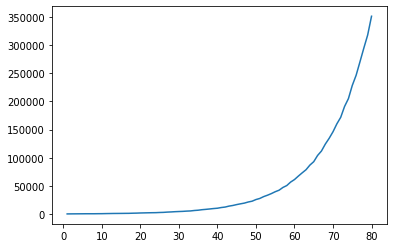

In [22]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(list(range(1,81)), ocean_obj.n_fish)

In [24]:
starting_dict = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0}
for i in data6:
    starting_dict[i] += 1
for i in range(256):
    new_dict = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0}
    for key in starting_dict.keys():
        if key == 0:
            new_dict[6]+=starting_dict[key]
            new_dict[8]+=starting_dict[key]
        else:
            new_dict[key-1]+=starting_dict[key]
    starting_dict=new_dict
print(sum(starting_dict.values()))

1595330616005


## Day 7

### Part 1

or example, consider the following horizontal positions:

16,1,2,0,4,2,7,1,2,14
This means there's a crab with horizontal position 16, a crab with horizontal position 1, and so on.

Each change of 1 step in horizontal position of a single crab costs 1 fuel. You could choose any horizontal position to align them all on, but the one that costs the least fuel is horizontal position 2:<br>

This costs a total of 37 fuel. This is the cheapest possible outcome; more expensive outcomes include aligning at position 1 (41 fuel), position 3 (39 fuel), or position 10 (71 fuel).

Determine the horizontal position that the crabs can align to using the least fuel possible. How much fuel must they spend to align to that position?

In [2]:
data7 = [] # Store measurements
with open('day_7_data.txt') as f:
    data7 = [int(i) for i in f.readlines()[0].split(',')]

In [3]:
data7[0:5]

[1101, 1, 29, 67, 1102]

In [4]:
# I think the optimal point would be the median
import numpy as np
# Works on the test data
np.median([16,1,2,0,4,2,7,1,2,14])

2.0

In [5]:
total_fuel = 0
optimal_point = np.median(data7)
for i in data7:
    total_fuel+=abs(i-optimal_point)
total_fuel

333755.0

### Part 2

As it turns out, crab submarine engines don't burn fuel at a constant rate. Instead, each change of 1 step in horizontal position costs 1 more unit of fuel than the last: the first step costs 1, the second step costs 2, the third step costs 3, and so on.

As each crab moves, moving further becomes more expensive. This changes the best horizontal position to align them all on; in the example above, this becomes 5:

Determine the horizontal position that the crabs can align to using the least fuel possible so they can make you an escape route! How much fuel must they spend to align to that position?

In [11]:
# total_fuel_calc part 2
def total_fuel_calc(crab_pos, optimal_point):
    total_fuel = 0
    for item in crab_pos:
        for i in range(1,abs(optimal_point-item)+1):
            #print(i)
            total_fuel+=i
    return total_fuel

total_fuel_calc([16,1,2,0,4,2,7,1,2,14],5)


# I am sure there is a more elegant way to do this but I will think about it later
# For now brute force seems to work

# Turns out the mean is the optimal point, probably could've figured that out if i though
# about it for 2 seconds
t_fuel_list = []
for i in range(100,750):
    t_fuel_list.append(total_fuel_calc(data7,i))


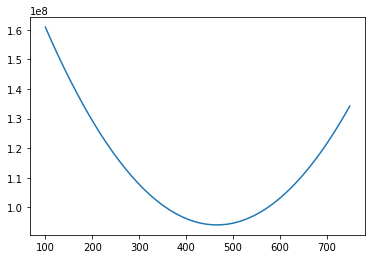

In [12]:
from matplotlib import pyplot as plt
plt.plot(list(range(100,750)),t_fuel_list)

In [13]:
new_opt = np.argmin(t_fuel_list)+100
answer = total_fuel_calc(data7, new_opt)
answer

94017638

## Day 8

### Part 1

https://adventofcode.com/2021/day/8

This ones hard to describe

In [49]:
import numpy as np
from collections import Counter

In [6]:
data8 = [] # Store measurements
with open('day_8_data.txt') as f:
    for i in f.readlines():
        data8.append(i.split("\n")[0])

In [23]:
part1_output = [i.split(' | ')[1] for i in data8]
length_mapping = {2:1,
                  4:4,
                  3:7,
                  7:8}

In [24]:
length_list = []
for item in part1_output:
    item = item.split(' ')
    lengths = [len(i) for i in item]
    length_list.append(lengths)

In [25]:
total_appearances = 0
for l_list in length_list:
    for l in l_list:
        if l in length_mapping.keys():
            total_appearances+=1
total_appearances

479

### Part 2

https://adventofcode.com/2021/day/8#part2

In [99]:
from collections import defaultdict
def pattern_solver(sequence):
    arrangement = defaultdict(set)
    total_tracked = []
    for item in sequence:
        if len(item) == 2: # Start with 2's
            arrangement['top_right'].add(item[0])
            arrangement['top_right'].add(item[1])
            arrangement['bottom_right'].add(item[0])
            arrangement['bottom_right'].add(item[1])
            total_tracked.append(item[0])
            total_tracked.append(item[1])
    #print(1)
    #print(arrangement)
    for item in sequence:
        if len(item) == 3: # Now 7's allows use to define the top letter - letter isnt already in dict
            for i in item:
                if i not in arrangement['top_right']:
                    arrangement['top'] = i
                    total_tracked.append(i)
    #print(2)
    #print(arrangement)
    #print(total_tracked)
    for item in sequence:
        if len(item) == 4: # Four allows us to limit the middle and top left to 2
            for i in item:
                if i not in list(arrangement['top_right']):
                    arrangement['middle'].add(i)
                    arrangement['top_left'].add(i)
                    total_tracked.append(i)

    #print(3)
    #print(arrangement)
    #print(total_tracked)
    for item in sequence:
        if len(item) == 6: # now look at 9, we know all present letters except bottom, so define bottom
            total_item = 0
            for i in item:
                if i in total_tracked:
                    total_item+=1
                else:
                    missed_item = i
            if total_item == 5:
                arrangement['bottom'] = missed_item
                total_tracked.append(missed_item)
                break
    #print(4)
    #print(arrangement)
    #print(total_tracked)
    for item in sequence:
        if len(item) == 7: # Now look at 8, we know all present except bottom left, define bottom left.
            total_item = 0
            for i in item:
                if i in total_tracked:
                    total_item+=1
                else:
                    missed_item = i
            if total_item == 6:
                arrangement['bottom_left'] = missed_item
                total_tracked.append(missed_item)
    #print(5)
    #print(arrangement)
    #print(total_tracked)
    for item in sequence:
        if len(item) == 5: # Now lets focus on 3. this needs to have all right, top, middle and bottom
            # Should be able to define middle by process of elim
            meets_reqs = 0
            for i in item:
                if i in list(arrangement['top_right']) or i in list(arrangement['top']) or i in list(arrangement['bottom']):
                    meets_reqs+=1
                else:
                    mid_item = i
            if meets_reqs == 4:
                arrangement['top_left'].remove(mid_item)
                arrangement['top_left'] = list(arrangement['top_left'])[0]
                arrangement['middle'] = mid_item
    #print(6)
    #print(arrangement)

    for item in sequence:
        undefined_counter = 0
        undefined_items = list(arrangement['top_right'])
        if len(item) == 6:
            for i in item:
                if i in undefined_items:
                    undefined_counter+=1
                    undefined_item = i
        if undefined_counter == 1:
            arrangement['top_right'].remove(undefined_item)
            arrangement['top_right'] = list(arrangement['top_right'])[0]
            arrangement['bottom_right'] = undefined_item
            break
    #print(7)
    #print(arrangement)


    inv_map = {v: k for k, v in arrangement.items()}


    return inv_map

position_to_number = {0:['top', 'top_left', 'bottom_left', 'bottom', 'bottom_right','top_right'],
                      1:['top_right', 'bottom_right'],
                      2:['top', 'top_right', 'middle', 'bottom_left', 'bottom'],
                      3:['top', 'top_right', 'middle', 'bottom_right','bottom'],
                      4:['top_right','top_left','middle','bottom_right'],
                      5:['top', 'top_left','middle', 'bottom_right','bottom'],
                      6:['top', 'top_left', 'middle', 'bottom_right', 'bottom', 'bottom_left'],
                      7:['top', 'top_right', 'bottom_right'],
                      8:['top', 'middle', 'bottom', 'bottom_right', 'top_right', 'bottom_left', 'top_left'],
                      9:['top', 'middle', 'bottom', 'top_left', 'top_right', 'bottom_right']}





In [100]:
all_answers = []
for item in data8:
    #print(item)
    input = item.split(' | ')[0]
    output = item.split(' | ')[1].split(' ')
    solved_dict = pattern_solver(input.split(' '))
    answer_list = []
    for output_str in output:
        #print(output_str)
        answer = [solved_dict[i] for i in output_str]
        for key in position_to_number.keys():
            if set(position_to_number[key]) == set(answer):
                answer_list.append(str(key))
    all_answers.append(int(''.join(answer_list)))


In [102]:
sum(all_answers)

1041746

### Day 9

### Part 1

Smoke flows to the lowest point of the area it's in. For example, consider the following heightmap:

2199943210
3987894921
9856789892
8767896789
9899965678
Each number corresponds to the height of a particular location, where 9 is the highest and 0 is the lowest a location can be.

Your first goal is to find the low points - the locations that are lower than any of its adjacent locations. Most locations have four adjacent locations (up, down, left, and right); locations on the edge or corner of the map have three or two adjacent locations, respectively. (Diagonal locations do not count as adjacent.)

In the above example, there are four low points, all highlighted: two are in the first row (a 1 and a 0), one is in the third row (a 5), and one is in the bottom row (also a 5). All other locations on the heightmap have some lower adjacent location, and so are not low points.

The risk level of a low point is 1 plus its height. In the above example, the risk levels of the low points are 2, 1, 6, and 6. The sum of the risk levels of all low points in the heightmap is therefore 15.

Find all of the low points on your heightmap. What is the sum of the risk levels of all low points on your heightmap?


In [6]:
data9 = [] # Store measurements
with open('day_9_data.txt') as f:
    for i in f.readlines():
        data9.append(i.split("\n")[0])

In [12]:
import numpy as np
data_map = np.zeros((len(data9[0]), len(data9)))
for row_ind, item in enumerate(data9):
    for col_ind, value in enumerate(item):
        data_map[row_ind,col_ind] = int(value)
data_map[0:5,0:5]

array([[9., 9., 7., 6., 5.],
       [8., 7., 6., 5., 4.],
       [9., 8., 9., 8., 5.],
       [8., 9., 8., 7., 6.],
       [7., 6., 9., 8., 7.]])

In [43]:
mins = []
min_row_col_pairs = []
for row_ind, row in enumerate(data_map):
    for col_ind, value in enumerate(row):
        comp_vals = []
        if row_ind != 0:
            top = data_map[row_ind-1,col_ind]
            comp_vals.append(top)
        if row_ind != len(data_map)-1:
            bottom = data_map[row_ind+1,col_ind]
            comp_vals.append(bottom)
        if col_ind != len(data_map[0])-1:
            right = data_map[row_ind, col_ind+1]
            comp_vals.append(right)
        if col_ind != 0:
            left = data_map[row_ind, col_ind-1]
            comp_vals.append(left)
        if value < min(comp_vals):
            mins.append(value+1)
            min_row_col_pairs.append(tuple([row_ind,col_ind]))
        #print(comp_vals, value)
sum(mins)

558.0

In [45]:
min_row_col_pairs

[(0, 43),
 (0, 78),
 (0, 96),
 (1, 7),
 (1, 15),
 (1, 24),
 (1, 36),
 (2, 65),
 (3, 53),
 (4, 13),
 (4, 90),
 (5, 31),
 (5, 46),
 (6, 3),
 (6, 19),
 (6, 60),
 (6, 80),
 (7, 9),
 (7, 41),
 (7, 84),
 (8, 96),
 (9, 8),
 (9, 71),
 (10, 65),
 (10, 77),
 (10, 87),
 (10, 91),
 (11, 35),
 (11, 56),
 (11, 82),
 (12, 1),
 (12, 13),
 (12, 23),
 (12, 48),
 (14, 32),
 (15, 70),
 (15, 81),
 (15, 88),
 (15, 98),
 (16, 8),
 (16, 40),
 (17, 29),
 (17, 78),
 (18, 16),
 (19, 1),
 (19, 53),
 (19, 64),
 (20, 20),
 (20, 25),
 (20, 82),
 (20, 92),
 (22, 13),
 (22, 73),
 (23, 6),
 (23, 33),
 (23, 46),
 (23, 79),
 (24, 88),
 (24, 98),
 (26, 0),
 (26, 25),
 (26, 61),
 (27, 53),
 (27, 69),
 (27, 77),
 (28, 82),
 (28, 94),
 (30, 4),
 (30, 10),
 (30, 24),
 (30, 30),
 (30, 42),
 (31, 36),
 (31, 61),
 (32, 99),
 (33, 0),
 (33, 7),
 (33, 25),
 (33, 47),
 (33, 72),
 (33, 87),
 (34, 17),
 (35, 57),
 (35, 91),
 (36, 42),
 (36, 65),
 (36, 78),
 (36, 99),
 (37, 0),
 (37, 9),
 (38, 34),
 (39, 21),
 (39, 29),
 (40, 42),
 (4

In [89]:
# To approach this lets make a few functions
valley_size = []

for item in min_row_col_pairs:
    to_check = set()
    to_check.add(item)
    included = set()
    checked = set()
    #print(to_check)
    while to_check != set():
        #print(to_check)
        #print(f"to check: {to_check}")
        pair = list(to_check)[0]
        #print(f"pair:{pair}")
        #print(f"checked: {checked}")
        if pair in checked:
            pass
        else:
            checked.add(pair)
            neighbor_vals = []
            neighbor_coords = []
            if  pair[0] != 0:
                top = data_map[pair[0]-1,pair[1]]
                neighbor_vals.append(top)
                neighbor_coords.append(tuple([pair[0]-1,pair[1]]))
            else:
                neighbor_vals.append(9)
                neighbor_coords.append(tuple([pair[0]-1,pair[1]]))
            if pair[0] != len(data_map)-1:
                bottom = data_map[pair[0]+1,pair[1]]
                neighbor_vals.append(bottom)
                neighbor_coords.append(tuple([pair[0]+1,pair[1]]))
            else:
                neighbor_vals.append(9)
                neighbor_coords.append(tuple([pair[0]+1,pair[1]]))
            if pair[1] != len(data_map[0])-1:
                right = data_map[pair[0], pair[1]+1]
                neighbor_vals.append(right)
                neighbor_coords.append(tuple([pair[0], pair[1]+1]))
            else:
                neighbor_vals.append(9)
                neighbor_coords.append(tuple([pair[0], pair[1]+1]))
            if pair[1] != 0:
                left = data_map[pair[0], pair[1]-1]
                neighbor_vals.append(left)
                neighbor_coords.append(tuple([pair[0], pair[1]-1]))
            else:
                neighbor_vals.append(9)
                neighbor_coords.append(tuple([pair[0], pair[1]-1]))
            for ind, idx in enumerate(neighbor_vals):
                if idx == 9:
                    included.add(pair)
                else:
                    to_check.add(neighbor_coords[ind])
                    included.add(pair)
            #print(f"remove: {pair}")
        to_check.remove(pair)
        #print("==========================================")
    valley_size.append(len(included))



In [90]:
sorted_valleys = sorted(valley_size, reverse=True)
answer = sorted_valleys[0]*sorted_valleys[1]*sorted_valleys[2]
answer

882942

### Day 10

#### Part 1

In [1]:
data10 = [] # Store measurements
with open('day_10_data.txt') as f:
    for i in f.readlines():
        data10.append(i.split("\n")[0])

In [11]:
lookups = {')':3,
           ']':57,
           '}':1197,
           '>':25137
}

def capture_wrong_char(test_example):
    opposites = {'{':'}',
                 '[':']',
                 '(':')',
                 '<':'>'
                 }
    allowed = ['[','(','{','<']
    running_list = []
    for i in test_example:
        if i in allowed:
            running_list.insert(0, opposites[i])
        elif i == running_list[0]:
            running_list.remove(i)
        else:
            #print(f'Expected {running_list[0]} and got {i}')
            return i

In [19]:
wrong_chars = []
for item in data10:
    wrong_item = capture_wrong_char(item)
    if wrong_item != None:
        wrong_chars.append(wrong_item)


total_sum = 0
for char in wrong_chars:
    total_sum+=lookups[char]
print(total_sum)

243939


### part 2

In [39]:
import numpy as np

In [36]:
def get_finishing_string(test_example):
    opposites = {'{':'}',
                 '[':']',
                 '(':')',
                 '<':'>'
                 }
    allowed = ['[','(','{','<']
    running_list = []
    for i in test_example:
        #print(running_list)
        if i in allowed:
            running_list.insert(0, opposites[i])
        elif i == running_list[0]:
            running_list.remove(i)
        else:
            #print(f'Expected {running_list[0]} and got {i}')
            break
    return running_list

def calc_score(finish_string):
    total_score = 0
    scoring = {')':1,
               ']':2,
               '}':3,
               '>':4}
    for string in finish_string:
        total_score*=5
        total_score+=scoring[string]
    return total_score

In [37]:
incomplete_strings = []
for item in data10:
    wrong_item = capture_wrong_char(item)
    if wrong_item == None:
        incomplete_strings.append(item)

In [38]:
finishing_strings = []
for inc_string in incomplete_strings:
    finishing_strings.append(get_finishing_string(inc_string))

In [40]:
scores = []
for finishing_string in finishing_strings:
    scores.append(calc_score(finishing_string))
np.median(scores)


2421222841.0

### Day 11

#### Part 1

In [81]:
data11 = [] # Store measurements
with open('day_11_data.txt') as f:
    for i in f.readlines():
        data11.append(i.split("\n")[0])

day_11_matrix = np.zeros((len(data11[0]), len(data11)))
for row_ind, l in enumerate(data11):
    for col_ind, c in enumerate(l):
        day_11_matrix[row_ind,col_ind] = int(c)

# handle this in 3 steps.
# First add 1 to every value
# Collect the coordinates of the 9's
# iterate over flashes until they are all done.

def search_matrix_nines(mat):
    coords = set()
    for row_ind, r in enumerate(mat):
        for col_ind, c in enumerate(r):
            if c == 10:
                coords.add((row_ind,col_ind))
    return coords

def flash(mat, coords):
    updates = [(0,1), (1,0), (1,1), (-1,-1), (-1,0), (0,-1), (1,-1), (-1,1)]
    new_nines = []
    for item in updates:
        coords_to_update = (coords[0]+item[0], coords[1] + item[1])
        if coords_to_update[0] >= 0 and coords_to_update[0] <= 9 and coords_to_update[1] >= 0 and coords_to_update[1] <= 9:
            if mat[coords_to_update[0],coords_to_update[1]] != 0 and mat[coords_to_update[0], coords_to_update[1]] <= 9:
                mat[coords_to_update[0], coords_to_update[1]] = mat[coords_to_update[0], coords_to_update[1]] + 1
            if mat[coords_to_update[0], coords_to_update[1]] == 10:
                new_nines.append((coords_to_update[0], coords_to_update[1]))
        #print(new_nines)
    mat[coords[0],coords[1]] = 0
    return mat, new_nines


num_flashes = 0
for iterative in range(100):
    flashed = set()
    day_11_matrix = day_11_matrix + 1
    nine_coords = search_matrix_nines(day_11_matrix)
    while nine_coords != set():
        flasher = list(nine_coords)[0]
        if flasher in flashed:
            pass
        else:
            day_11_matrix, nine_list = flash(day_11_matrix, flasher)
            for new_nine in nine_list:
                if new_nine not in flashed:
                    nine_coords.add(new_nine)
            flashed.add(flasher)
            nine_coords.remove(flasher)
            num_flashes+=1
num_flashes

1603

### Part 2

In [94]:
data11 = [] # Store measurements
with open('day_11_data.txt') as f:
    for i in f.readlines():
        data11.append(i.split("\n")[0])

day_11_matrix = np.zeros((len(data11[0]), len(data11)))
for row_ind, l in enumerate(data11):
    for col_ind, c in enumerate(l):
        day_11_matrix[row_ind,col_ind] = int(c)

# handle this in 3 steps.
# First add 1 to every value
# Collect the coordinates of the 9's
# iterate over flashes until they are all done.

def search_matrix_nines(mat):
    coords = set()
    for row_ind, r in enumerate(mat):
        for col_ind, c in enumerate(r):
            if c == 10:
                coords.add((row_ind,col_ind))
    return coords

def flash(mat, coords):
    updates = [(0,1), (1,0), (1,1), (-1,-1), (-1,0), (0,-1), (1,-1), (-1,1)]
    new_nines = []
    for item in updates:
        coords_to_update = (coords[0]+item[0], coords[1] + item[1])
        if coords_to_update[0] >= 0 and coords_to_update[0] <= 9 and coords_to_update[1] >= 0 and coords_to_update[1] <= 9:
            if mat[coords_to_update[0],coords_to_update[1]] != 0 and mat[coords_to_update[0], coords_to_update[1]] <= 9:
                mat[coords_to_update[0], coords_to_update[1]] = mat[coords_to_update[0], coords_to_update[1]] + 1
            if mat[coords_to_update[0], coords_to_update[1]] == 10:
                new_nines.append((coords_to_update[0], coords_to_update[1]))
        #print(new_nines)
    mat[coords[0],coords[1]] = 0
    return mat, new_nines

count = 0
for iterative in range(1000):
    if np.sum(day_11_matrix) != 0:
        flashed = set()
        day_11_matrix = day_11_matrix + 1
        nine_coords = search_matrix_nines(day_11_matrix)
        while nine_coords != set():
            flasher = list(nine_coords)[0]
            if flasher in flashed:
                pass
            else:
                day_11_matrix, nine_list = flash(day_11_matrix, flasher)
                for new_nine in nine_list:
                    if new_nine not in flashed:
                        nine_coords.add(new_nine)
                flashed.add(flasher)
                nine_coords.remove(flasher)
                num_flashes+=1
        count += 1
    else:
        break
count

222

### Day 12

#### Part 1

In [249]:
data12 = [] # Store measurements
with open('day_12_data.txt') as f:
    for i in f.readlines():
        data12.append(i.split("\n")[0])

In [250]:
from collections import defaultdict, Counter
import copy
# First get all unique items and mark them as upper or lower

items_total = set() # store unique items
item_type = {} # store item type

for edge in data12:
    edges = edge.split('-')
    for node in edges:
        items_total.add(node)
        if node == 'start' or node == 'end':
            item_type[node] = 0
        elif node.upper() == node:
            item_type[node] = 0
        else:
            item_type[node] = 1

# Now lets get all paths and store in dictionary
# Key is starting point and value is list of all connections
paths = defaultdict(set)

for item in items_total:
    for edge in data12:
        nodes = edge.split('-')
        if nodes[0] == item:
            paths[item].add(nodes[1])
        if nodes[1] == item:
            paths[item].add(nodes[0])


In [251]:
# lets get started
# All starting Treks
all_treks = set()
for item in paths['start']:
    current_path = (','.join(['start', item]),1)
    all_treks.add(current_path)

# Get list of all lowercase items
lower_cases = []
for node in items_total:
    if item_type[node] == 1:
        lower_cases.append(node)

# Now lets iterate over creating treks
# Store completed treks
completed_treks = set()

while len(all_treks) != 0:
    for item in list(all_treks): # loop through each trek
        if item[1] != 0: # Make sure trek is not dead --> should never happen as these are never added to list
            split_path = item[0].split(',') # get list of nodes from string
            for new_trek in paths[split_path[-1]]: # get all connections to latest node
                if new_trek == 'start': # don't bounce between start and first node
                    continue
                new_path = copy.deepcopy(split_path) # copy
                new_path.append(new_trek) # add new node
                fails = False # store whether it meets the one lowercase node each criteria
                item_count = Counter(new_path) # count number of each node in path
                for letters in lower_cases: # if more than one lowercase node it fails
                    if item_count[letters]>1:
                        fails=True
                if new_trek == 'end': # if it ends, its complete
                    completed_treks.add((','.join(new_path),0))
                elif fails: # if it fails, its complete
                    completed_treks.add((','.join(new_path),0))
                else: # otherwise it continues adding nodes
                    all_treks.add((','.join(new_path),1))
        all_treks.remove((','.join(split_path),1)) # remove current node from list to check



In [252]:
total_good_treks = 0
for trek in completed_treks:
    #print(trek)
    #print(trek[0].split(',')[-1])
    if trek[0].split(',')[-1] == 'end':
        total_good_treks+=1
        #print(trek)
print(total_good_treks)


5228


#### Part 2

In [253]:
# First get all unique items and mark them as upper or lower

items_total = set() # store unique items
item_type = {} # store item type

for edge in data12:
    edges = edge.split('-')
    for node in edges:
        items_total.add(node)
        if node == 'start' or node == 'end':
            item_type[node] = 0
        elif node.upper() == node:
            item_type[node] = 0
        else:
            item_type[node] = 1

# Now lets get all paths and store in dictionary
# Key is starting point and value is list of all connections
paths = defaultdict(set)

for item in items_total:
    for edge in data12:
        nodes = edge.split('-')
        if nodes[0] == item:
            paths[item].add(nodes[1])
        if nodes[1] == item:
            paths[item].add(nodes[0])

In [254]:
# lets get started
# All starting Treks
all_treks = set()
for item in paths['start']:
    current_path = (','.join(['start', item]),1)
    all_treks.add(current_path)

# Get list of all lowercase items
lower_cases = []
for node in items_total:
    if item_type[node] == 1:
        lower_cases.append(node)

# Now lets iterate over creating treks
# Store completed treks
completed_treks = set()

while len(all_treks) != 0:
    #print(len(all_treks))
    for item in list(all_treks): # loop through each trek
        if item[1] != 0: # Make sure trek is not dead --> should never happen as these are never added to list
            split_path = item[0].split(',') # get list of nodes from string
            for new_trek in paths[split_path[-1]]: # get all connections to latest node
                if new_trek == 'start': # don't bounce between start and first node
                    continue
                new_path = copy.deepcopy(split_path) # copy
                new_path.append(new_trek) # add new node
                fails = 0 # in this iteration, store number of lower cases with more than two visits
                failed = False
                item_count = Counter(new_path) # count number of each node in path
                for letters in lower_cases: # if more than one lowercase node it fails
                    if item_count[letters]>1:
                        fails+=1
                    if item_count[letters]>2:
                        failed = True
                #print(fails)
                if new_trek == 'end': # if it ends, its complete
                    completed_treks.add((','.join(new_path),0))
                elif fails > 1 or failed: # if it fails, its complete
                    completed_treks.add((','.join(new_path),0))
                else: # otherwise it continues adding nodes
                    all_treks.add((','.join(new_path),1))

        all_treks.remove((','.join(split_path),1)) # remove current node from list to check
    #print(all_treks)

In [255]:
total_good_treks = 0
for trek in completed_treks:
    #print(trek)
    #print(trek[0].split(',')[-1])
    if trek[0].split(',')[-1] == 'end':
        total_good_treks+=1
        #print(trek)
print(total_good_treks)

131228


### Day 13

#### Part 1

In [653]:
data13 = [] # Store measurements
with open('day_13_data.txt') as f:
    for i in f.readlines():
        data13.append(i.split("\n")[0])
data13.remove('')

In [654]:
coords1 = [i for i in data13 if i[0].isdigit()]
instructions = [i for i in data13 if not i[0].isdigit()]

coords1 = [(int(i.split(',')[1]), int(i.split(',')[0])) for i in coords1]


In [655]:
def fold_paper(coords, instr):
    instruction = instr.split(' ')[2]
    direction = instruction.split('=')[0]
    value = int(instruction.split('=')[1])

    new_coords = []
    if direction == 'x':
        for i in coords:
            if i[1] > value:
                new_coords.append((i[0], value*2 - i[1]))
            else:
                new_coords.append(i)
    else:
        for i in coords:
            if i[0] > value:
                new_coords.append((value*2 - i[0], i[1]))
            else:
                new_coords.append(i)
    return set(new_coords)

In [656]:
my_coords = fold_paper(coords1, instructions[0])
print(len(my_coords))

610


#### Part 2

In [657]:
from matplotlib import pyplot as plt
for instr in instructions:
    print(instr)
    coords1 = fold_paper(coords1,instr)

max_row = max([i[0] for i in coords1])+1
max_col = max([i[1] for i in coords1])+1
min_col = min(i[1] for i in coords1)-1

final_mat = np.zeros((max_row,max_col-min_col))

for c in coords1:
    final_mat[c[0],c[1]] = 1

pd.DataFrame(final_mat).to_csv('day_13_message.csv', header=None, index=False)

fold along x=655
fold along y=447
fold along x=327
fold along y=223
fold along x=163
fold along y=111
fold along x=81
fold along y=55
fold along x=40
fold along y=27
fold along y=13
fold along y=6
